Loaded model from disk
Found 16870 images belonging to 5 classes.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9536\2405489491.py:32: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[ 812    8 1156 1966   51]
 [  91    2  129  206    8]
 [ 802    4 1245 2004   48]
 [1546   19 2099 3402   98]
 [ 245    3  315  599   12]]


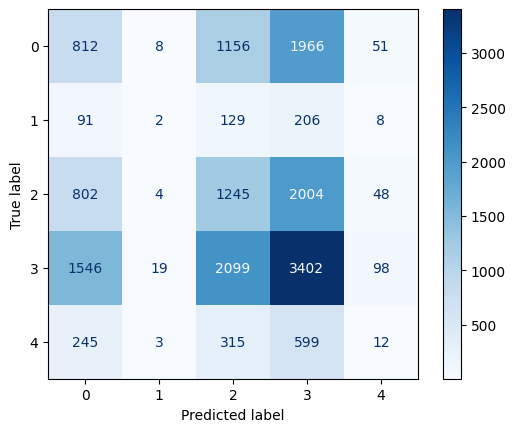

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.23      0.20      0.22      3993
           1       0.06      0.00      0.01       436
           2       0.25      0.30      0.28      4103
           3       0.42      0.47      0.44      7164
           4       0.06      0.01      0.02      1174

    accuracy                           0.32     16870
   macro avg       0.20      0.20      0.19     16870
weighted avg       0.30      0.32      0.31     16870



In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral"}

# load json and create model
json_file = open('./emotion_detection_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("./emotion_detection_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'archive/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))
